In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

## About Dataset
###### This dataset is a simulated collection of 172,000 records, designed to analyze stroke risks among Indians. It integrates key variables such as demographics, medical history, lifestyle choices, and regional distinctions. With a balanced variety of categorical and numerical features, this dataset offers a rich foundation for machine learning, statistical analysis, and data visualization.

###### Insights by User Expertise Levels

###### Beginner-Level Insights
###### "Data Exploration: Basic understanding of variables and distribution (e.g., average BMI, glucose levels).
###### Visualization: Create bar charts for gender distribution or pie charts for residence types.
###### Correlation Analysis: Explore relationships between stroke occurrences and factors like hypertension or heart disease."

###### Intermediate-Level Insights
###### Feature Engineering: Identify and preprocess features like "Stroke Risk Score" or derive new variables (e.g., Age Groups).
###### Predictive Modeling: Build logistic regression models to predict stroke occurrences.
###### Clustering: Group individuals by health profiles (e.g., clustering based on BMI, glucose levels, and physical activity).

###### Advanced-Level Insights
###### Deep Learning Models: Train neural networks to enhance stroke prediction accuracy.
###### Time Series Analysis: Simulate longitudinal changes in stroke risk using sleep hours or stress levels.
###### Causal Inference: Investigate causality between lifestyle factors and stroke risk using advanced statistical models."

In [2]:
df = pd.read_csv('Data/Stroke_Prediction_Indians.csv')

In [3]:
df.shape

(172000, 22)

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,ID,Age,Gender,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,Smoking Status,Physical Activity,Dietary Habits,Alcohol Consumption,Chronic Stress,Sleep Hours,Family History of Stroke,Education Level,Income Level,Stroke Risk Score,Region,Stroke Occurrence
0,1,78,Female,0,0,1,Private,Rural,267.30,36.2,Formerly smoked,Sedentary,Non-Vegetarian,0,0,11,0,Tertiary,Middle,88,South,0
1,2,60,Female,0,0,0,Private,Rural,207.24,19.8,Never smoked,Light,Vegetarian,0,0,9,0,Secondary,High,56,East,0
2,3,69,Male,0,0,0,Private,Urban,161.30,34.5,Never smoked,Sedentary,Mixed,1,0,3,0,Secondary,High,63,North,1
3,4,43,Male,0,0,1,Never Worked,Urban,247.49,48.8,Never smoked,Active,Mixed,0,1,4,0,Tertiary,Middle,93,South,0
4,5,30,Female,0,0,1,Government,Urban,116.57,31.3,Formerly smoked,Light,Mixed,0,1,9,0,Secondary,High,99,West,0


In [5]:
df = df.drop(columns=["ID","Education Level"],axis = 1)

In [6]:
df.columns

Index(['Age', 'Gender', 'Hypertension', 'Heart Disease', 'Ever Married',
       'Work Type', 'Residence Type', 'Average Glucose Level', 'BMI',
       'Smoking Status', 'Physical Activity', 'Dietary Habits',
       'Alcohol Consumption', 'Chronic Stress', 'Sleep Hours',
       'Family History of Stroke', 'Income Level', 'Stroke Risk Score',
       'Region', 'Stroke Occurrence'],
      dtype='object')

In [7]:
# There is no Missing Columns
df.isnull().sum()

Age                         0
Gender                      0
Hypertension                0
Heart Disease               0
Ever Married                0
Work Type                   0
Residence Type              0
Average Glucose Level       0
BMI                         0
Smoking Status              0
Physical Activity           0
Dietary Habits              0
Alcohol Consumption         0
Chronic Stress              0
Sleep Hours                 0
Family History of Stroke    0
Income Level                0
Stroke Risk Score           0
Region                      0
Stroke Occurrence           0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,172000.0,54.009826,21.076357,18.0,36.00,54.00,72.00,90.0
Hypertension,172000.0,0.150134,0.357203,0.0,0.00,0.00,0.00,1.0
Heart Disease,172000.0,0.100279,0.300373,0.0,0.00,0.00,0.00,1.0
Ever Married,172000.0,0.300965,0.458679,0.0,0.00,0.00,1.00,1.0
Average Glucose Level,172000.0,184.931265,66.314107,70.0,127.54,184.76,242.44,300.0
BMI,172000.0,30.012799,11.570356,10.0,20.00,30.00,40.10,50.0
Alcohol Consumption,172000.0,0.200169,0.400128,0.0,0.00,0.00,0.00,1.0
Chronic Stress,172000.0,0.250000,0.433014,0.0,0.00,0.00,0.25,1.0
Sleep Hours,172000.0,7.500221,2.875179,3.0,5.00,7.00,10.00,12.0
Family History of Stroke,172000.0,0.148948,0.356038,0.0,0.00,0.00,0.00,1.0


In [9]:
df.describe(include='object').T

,count,unique,top,freq
Gender,172000,3,Male,82626
Work Type,172000,5,Private,86041
Residence Type,172000,2,Urban,86079
Smoking Status,172000,4,Never smoked,103438
Physical Activity,172000,4,Sedentary,68967
Dietary Habits,172000,3,Non-Vegetarian,86006
Income Level,172000,3,Low,86133
Region,172000,4,East,43115


In [10]:
df['Stroke Occurrence'].value_counts()

Stroke Occurrence
0    154904
1     17096
Name: count, dtype: int64

In [11]:
df[df['Stroke Occurrence']==1].sort_values(by=['Age'])

,Age,Gender,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,Smoking Status,Physical Activity,Dietary Habits,Alcohol Consumption,Chronic Stress,Sleep Hours,Family History of Stroke,Income Level,Stroke Risk Score,Region,Stroke Occurrence
66332,18,Male,0,0,0,Government,Rural,275.01,16.0,Never smoked,Sedentary,Non-Vegetarian,0,0,9,0,High,25,North,1
35023,18,Male,0,0,1,Government,Urban,231.62,22.2,Never smoked,Moderate,Non-Vegetarian,0,0,9,0,Middle,28,West,1
67532,18,Male,0,0,1,Self-employed,Urban,199.71,32.7,Never smoked,Sedentary,Non-Vegetarian,1,0,6,0,Middle,15,North,1
141437,18,Female,0,0,0,Private,Urban,152.44,43.4,Never smoked,Sedentary,Vegetarian,1,0,11,0,Middle,30,North,1
21214,18,Female,0,0,0,Private,Rural,188.49,26.3,Never smoked,Light,Vegetarian,0,1,8,1,Low,26,South,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47648,90,Female,0,0,0,Never Worked,Urban,78.95,24.3,Formerly smoked,Sedentary,Mixed,0,1,7,0,Low,94,West,1
87954,90,Female,1,0,0,Children,Urban,200.80,29.1,Formerly smoked,Light,Vegetarian,0,1,6,0,Middle,3,West,1
159272,90,Female,0,0,0,Private,Rural,110.26,31.5,Smokes,Moderate,Non-Vegetarian,0,0,4,0,Low,22,South,1
170745,90,Male,0,0,0,Government,Rural,224.75,31.4,Never smoked,Sedentary,Vegetarian,0,0,9,0,High,100,North,1


In [18]:
import random
new_data = df[['Average Glucose Level','Stroke Risk Score',"BMI","Stroke Occurrence"]]

new_data = new_data.sample(n=100,random_state=42)

<Axes: xlabel='Average Glucose Level', ylabel='Stroke Risk Score'>

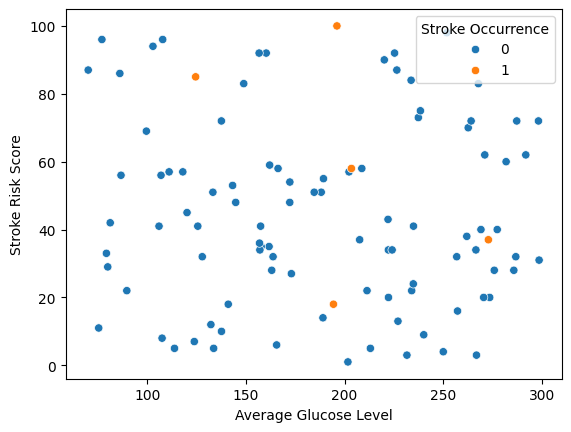

In [19]:
sns.scatterplot(data=new_data,x = 'Average Glucose Level',y='Stroke Risk Score',hue="Stroke Occurrence")

<Axes: xlabel='BMI', ylabel='Stroke Risk Score'>

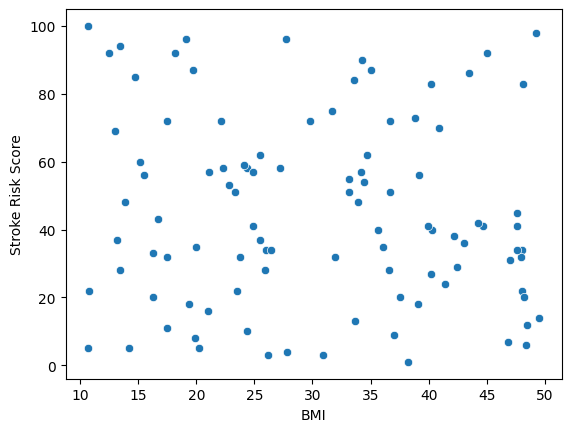

In [17]:
sns.scatterplot(data=new_data,x = 'BMI',y='Stroke Risk Score')

In [22]:
from tqdm import tqdm
import time

for i in tqdm(range(100),desc="processing"):
    time.sleep(0.2)

processing: 100%|██████████| 100/100 [00:20<00:00,  4.93it/s]
